**NOTE: A LARGE MAJORITY OF CODE IN THIS ASSIGNMENT IS REPEATED WITH A FEW CHANGES**

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.
#All the import statements required for the assignment
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


#ignore the warnings
import warnings
warnings.filterwarnings('ignore')

['wisconsin_breast_cancer.csv']


**Author: Jeffrey Jose, ID: 1313512**

In [2]:
#Loading the data, filling in blank columns with 0 and showing the first 5 data entries
wbcData = pd.read_csv('../input/wisconsin_breast_cancer.csv')
wbcData = wbcData.fillna(0)
wbcData.head()

,id,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,1000025,5,1,1,1,2,1.0,3,1,1,0
1,1002945,5,4,4,5,7,10.0,3,2,1,0
2,1015425,3,1,1,1,2,2.0,3,1,1,0
3,1016277,6,8,8,1,3,4.0,3,7,1,0
4,1017023,4,1,1,3,2,1.0,3,1,1,0


In [3]:
#Showing the information about each column in the data
wbcData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
id           699 non-null int64
thickness    699 non-null int64
size         699 non-null int64
shape        699 non-null int64
adhesion     699 non-null int64
single       699 non-null int64
nuclei       699 non-null float64
chromatin    699 non-null int64
nucleoli     699 non-null int64
mitosis      699 non-null int64
class        699 non-null int64
dtypes: float64(1), int64(10)
memory usage: 60.1 KB


In [4]:
#Split the data to train and test, in a stratified way, 80:20
x = wbcData.iloc[:, 1:10]
y = wbcData.iloc[:, -1]

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, stratify = y, random_state = 1313512)

print(len(x_train), len(x_test), len(y_train), len(y_test))
#Both the trains should be 80% of the data = 559.2 => 559
#Both the tests should be 20% of the data = 139.8 => 140
#My results are fairly close to these values

559 140 559 140


In [5]:
#Initialising a SGD Classifier on the train dataset
#Random state is my ID number
sgd_clf = SGDClassifier(random_state=1313512)
sgd_clf.fit(x_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=1313512, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [6]:
#function to determine output all the possible subsets for the 9 input features
def recieve_ss(full_s):
    list_representation = list(full_s)
    
    ss = []
    for i in range(1,2**len(list_representation)):
        subset_array = []
        for j in range(len(list_representation)):
            if i & 1<<j:
                subset_array.append(list_representation[j])
        ss.append(subset_array)
        
    return ss

column_set = set(['thickness', 'size', 'shape', 'adhesion', 'single', 'nuclei', 'chromatin', 'nucleoli', 'mitosis'])
ss = recieve_ss(column_set)
cols = []

#add the means of the validation cross of the fitted model onto the array
for i in range(511):
    cols.append(np.mean(cross_val_score(sgd_clf, x_train[ss[i]], y_train, cv=10, scoring="accuracy")))

#display highest stats information including highest possible accuracy and the subset and location index it's located in
import operator
index, value = max(enumerate(cols), key=operator.itemgetter(1))

#print out all the subsets (commented)
#print(cols)
print("Subset: " + str(ss[index]))
print("Cross-Validation Score: " + str(value))
print("Index Position Of The Above Subset: " + str(index))

Subset: ['nuclei', 'shape', 'size', 'thickness', 'single']
Cross-Validation Score: 0.9748980405559354
Index Position Of The Above Subset: 402


In [7]:
column_set = set(['thickness', 'size', 'shape', 'adhesion', 'single', 'nuclei', 'chromatin', 'nucleoli', 'mitosis'])
ss = recieve_ss(column_set)
cols_test = []

#loop through all the subsets and fit the model using the trained data
#predict the test accuracy using the fitted model
#add all the accuracy scores onto the array
for i in range(511):
    sgd_clf.fit(x_train[ss[i]], y_train)
    prediction = sgd_clf.predict(x_test[ss[i]])
    cols_test.append(accuracy_score(y_test, prediction))

#fit the model on the index and predict the result
sgd_clf.fit(x_train[ss[index]], y_train)
y_prediction = sgd_clf.predict(x_test[ss[index]])

#print the accuracy of the prediction
print("Best Accuracy Of This Subset On The Test Data: " + str(accuracy_score(y_test, y_prediction)))
 
#display highest stats information including highest possible accuracy and the subset and location index it's located in
index, value = max(enumerate(cols_test), key=operator.itemgetter(1))


print("Best Possible Test Data Accuracy: " + str(value))
print("Subset: " + str(ss[index]))
print("Index Position: " + str(index))

Best Accuracy Of This Subset On The Test Data: 0.9142857142857143
Best Possible Test Data Accuracy: 0.95
Subset: ['shape', 'mitosis', 'chromatin', 'thickness']
Index Position: 169


**Which subset looks best given the cross-validation score?** <br />
*The subset that looks the best given the cross-validation score is one that consists of ['size', 'nuclei', 'single', 'shape', 'thickness']. The cross validation for this subset is 0.9749 (4 d.p). * <br />
**What is the best accuracy of this subset on the test data?** <br />
*The accuracy of this subset on the data is 0.9143 (4.dp) as shown by the accuracy score. (This can differ with each run)* <br />
**Is that the best possible test data accuracy?** <br />
*No, I believe that the best test data accuracy possible on this subset is 0.95 as indicated by the variable value. However accuracy of the test data can be dependent on the train and test size and the number of splits the data goes through.*

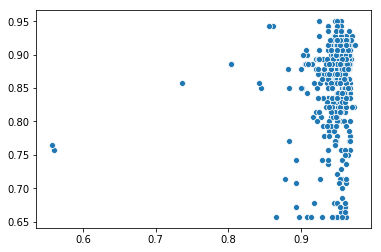

In [8]:
#scatter-plot of cross validation and test accuracy
sns.scatterplot(cols, cols_test)

In [9]:
#RandomForestClassifier
#fit a random forest classifier on the x_train and y_train
rf_clf = RandomForestClassifier(n_estimators = 30, random_state = 1313512)
rf_clf.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=None,
            oob_score=False, random_state=1313512, verbose=0,
            warm_start=False)

In [10]:
column_array = []
#add the means of the validation cross of the fitted model onto the array
for i in range(511):
    column_array.append(np.mean(cross_val_score(rf_clf, x_train[ss[i]], y_train, cv=10, scoring = "accuracy")))

#display highest stats information including highest possible accuracy and the subset and location index it's located in
index, value = max(enumerate(cols), key=operator.itemgetter(1))

print("Subset: " + str(ss[index]))
print("Best Validation Cross For The Set: " + str(value))
print("Index Position: " + str(index))

Subset: ['nuclei', 'shape', 'size', 'thickness', 'single']
Best Validation Cross For The Set: 0.9748980405559354
Index Position: 402


In [11]:
column_array_test = []

#loop through all the subsets and fit the model using the trained data
#predict the test accuracy using the fitted model
#add all the accuracy scores onto the array
for i in range(511):
    rf_clf.fit(x_train[ss[i]], y_train)
    prediction = rf_clf.predict(x_test[ss[i]])
    column_array_test.append(accuracy_score(y_test, prediction))

#fit the model on the index and predict the result
rf_clf.fit(x_train[ss[index]], y_train)
y_prediction = rf_clf.predict(x_test[ss[index]])

#print the accuracy of the prediction
print("Accuracy: " + str(accuracy_score(y_test, y_prediction)))

#display highest stats information including highest possible accuracy and the subset and location index it's located in
index, value = max(enumerate(column_array_test), key=operator.itemgetter(1))

print("Best Possible Accuracy: " + str(value))
print("Subset Of The Best Accuracy: " + str(ss[index]))
print("Index Position Of The Above Subset: " + str(index))

Accuracy: 0.9428571428571428
Best Possible Accuracy: 0.9642857142857143
Subset Of The Best Accuracy: ['shape', 'nucleoli', 'mitosis', 'thickness']
Index Position Of The Above Subset: 141


**Which subset looks best given the cross-validation score?** <br />
*The subset containing ['size', 'nuclei', 'single', 'shape', 'thickness'] looks the best given the cross-validation. The cross-validation score of this particular subset is 0.9749 (4 d.p).* <br />
**What is the best accuracy of this subset on the test data?** <br />
*The best accuracy of this subset on the test data is 0.9429 (4 d.p) as shown by the accuracy score.* <br />
**Is that the best possible test data accuracy?** <br />
*No the best possible test data accuracy on this particular set is 0.9643 (4 d.p). This belongs to the subset of ['shape', 'thickness', 'nucleoli'] which is located on index 175 *

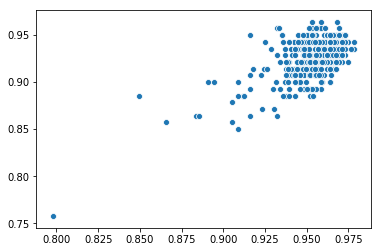

In [12]:
#creating a scatter plot for the accuracy distribution of the test and cross validation
sns.scatterplot(column_array, column_array_test)

In [13]:
#fit a Gaussian NB classifier on the x_train and y_train
gaussian_clf = GaussianNB(priors=None)
gaussian_clf.fit(x_train, y_train)

column = []

#add the means of the validation cross of the fitted model onto the array
for i in range(511):
    column.append(np.mean(cross_val_score(gaussian_clf, x_train[ss[i]], y_train, cv=10, scoring = "accuracy")))

#display highest stats information including highest possible accuracy and the subset and location index it's located in
index,value = max(enumerate(column), key=operator.itemgetter(1))

print("Subset: " + str(ss[index]))
print("Cross Validation Score: " + str(value))
print("Index Position: " + str(index))

Subset: ['nuclei', 'size', 'thickness']
Cross Validation Score: 0.9712628161312372
Index Position: 144


In [14]:
columnTest = []

#loop through all the subsets and fit the model using the trained data
#predict the test accuracy using the fitted model
#add all the accuracy scores onto the array
for i in range(511):
    gaussian_clf.fit(x_train[ss[i]], y_train)
    gaussian_prediction = gaussian_clf.predict(x_test[ss[i]])
    columnTest.append(accuracy_score(y_test, gaussian_prediction))

#fit the model on the index and predict the result
gaussian_clf.fit(x_train[ss[index]], y_train)
y_prediction = gaussian_clf.predict(x_test[ss[index]])

#print the accuracy of the prediction
print("Accuracy: " + str(accuracy_score(y_test, y_prediction)))

#display highest stats information including highest possible accuracy and the subset and location index it's located in
index, value = max(enumerate(columnTest), key=operator.itemgetter(1))

print("Best Possible Accuracy: " + str(value))
print("Subset Of The Best Accuracy: " + str(ss[index]))
print("Index Position Of The Above Subset: " + str(index))

Accuracy: 0.95
Best Possible Accuracy: 0.9714285714285714
Subset Of The Best Accuracy: ['shape', 'nucleoli', 'thickness']
Index Position Of The Above Subset: 133


**Which subset looks best given the cross-validation score?** <br />
*The subset containing ['size', 'nuclei', 'thickness'] gives the best cross-validation score of 0.9713 (4 d.p)* <br />
**What is the best accuracy of this subset on the test data?** <br />
*The best accuracy of this subset on the test data is 0.9500 (4 d.p) as shown by the accuracy score.* <br />
**Is that the best possible test data accuracy?** <br />
*No the best possible test data accuracy on this particular set is 0.9714 (4 d.p). This belongs to the subset ['shape', 'thickness', 'nucleoli'] which is located on index 175. *

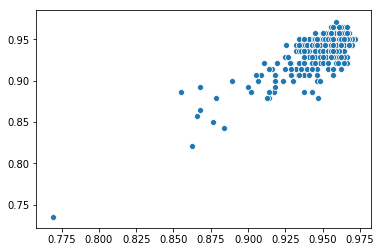

In [15]:
#creating a scatter plot for the accuracy distribution of the test and cross validation
sns.scatterplot(column ,columnTest)

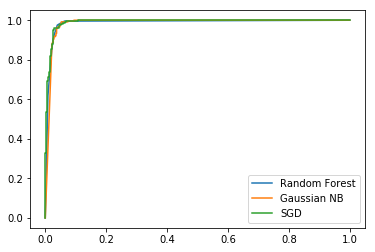

In [16]:
#all the imports required for a roc_curve function and plotting
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_predict
from matplotlib import pyplot

#RANDOM FOREST CLASSIFIER
forest_clf = RandomForestClassifier(random_state = 1313512)
y_probas_forest = cross_val_predict(forest_clf, x, y, cv=10, method="predict_proba")

y_probas_forest

y_scores_forest = y_probas_forest[:, 1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y, y_scores_forest)
fpr_forest, tpr_forest, thresholds_forest

#GAUSSIAN NB 
gauss_clf = GaussianNB(priors=None)
y_probas_gauss = cross_val_predict(gauss_clf, x, y, cv=10, method="predict_proba")

y_scores_gauss = y_probas_gauss[: ,1]
fpr_gauss, tpr_gauss, thresholds_gauss = roc_curve(y, y_scores_gauss)
fpr_gauss, tpr_gauss, thresholds_gauss

#SGD CLASSIFIER
y_scores = cross_val_predict(sgd_clf, x, y, cv=10, method="decision_function")
y_scores_sgd = y_scores[:]
fpr_sgd, tpr_sgd, thresholds_sgd = roc_curve(y, y_scores_sgd)
fpr_sgd, tpr_sgd, thresholds_sgd

#PLOTTING THE ROC_CURVE WITH THE THREE LABELS
pyplot.plot(fpr_forest, tpr_forest, label="Random Forest")
pyplot.plot(fpr_gauss, tpr_gauss, label="Gaussian NB")
pyplot.plot(fpr_sgd, tpr_sgd, label="SGD")
pyplot.legend(loc="lower right")

In [17]:
#See the array values of y_probas_forest, y_probas_gauss and y_scores
print("Random Forest Classifier: ")
y_probas_forest

Random Forest Classifier: 


array([[1. , 0. ],
       [0.2, 0.8],
       [1. , 0. ],
       ...,
       [0.1, 0.9],
       [0.2, 0.8],
       [0.2, 0.8]])

In [18]:
print("Gaussian NB: ")
y_probas_gauss

Gaussian NB: 


array([[9.99999998e-01, 1.78020149e-09],
       [2.59358200e-23, 1.00000000e+00],
       [9.99999999e-01, 6.77122243e-10],
       ...,
       [2.93391232e-57, 1.00000000e+00],
       [6.24044505e-28, 1.00000000e+00],
       [5.74971681e-33, 1.00000000e+00]])

In [19]:
print("SGD: ")
y_scores

SGD: 


array([-3.81856493e+02,  2.77723115e+02, -3.23871473e+02,  3.23627923e+02,
       -3.40783770e+02,  9.05894171e+02,  3.85349058e+01, -3.23871473e+02,
       -2.77966665e+02, -3.64944195e+02, -3.50447940e+02, -3.77024408e+02,
       -4.60265825e+01, -2.65886452e+02,  6.06304899e+02, -2.91142849e+01,
       -3.91520663e+02, -3.74608366e+02,  4.75838602e+02, -3.89104621e+02,
        4.22685667e+02,  4.03357327e+02, -3.84272536e+02, -1.06427646e+02,
       -3.52863983e+02,  1.49672862e+02, -3.55280025e+02, -3.98768791e+02,
       -3.77024408e+02, -3.14207302e+02, -3.81856493e+02, -3.60112110e+02,
        3.50204391e+02, -3.43199813e+02, -3.48031898e+02, -3.77024408e+02,
        5.33823623e+02, -2.92462920e+02,  4.87918815e+02,  2.68058945e+02,
        2.43898520e+02, -4.95385963e+00,  7.44019322e+02, -3.87784549e+01,
        4.85502772e+02, -3.40783770e+02,  5.89392601e+02, -3.69776281e+02,
       -3.40783770e+02,  5.21743410e+02,  1.35176607e+02, -2.53781711e+00,
        2.68058945e+02,  